
📋 Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.75      0.27      0.40       151
           comp.graphics       0.70      0.68      0.69       202
 comp.os.ms-windows.misc       0.67      0.66      0.66       195
comp.sys.ibm.pc.hardware       0.55      0.78      0.64       183
   comp.sys.mac.hardware       0.87      0.67      0.75       205
          comp.windows.x       0.90      0.81      0.85       215
            misc.forsale       0.79      0.70      0.74       193
               rec.autos       0.84      0.76      0.79       196
         rec.motorcycles       0.49      0.77      0.60       168
      rec.sport.baseball       0.92      0.83      0.88       211
        rec.sport.hockey       0.88      0.92      0.90       198
               sci.crypt       0.70      0.85      0.77       201
         sci.electronics       0.85      0.62      0.72       202
                 sci.med       0.91      0.86   

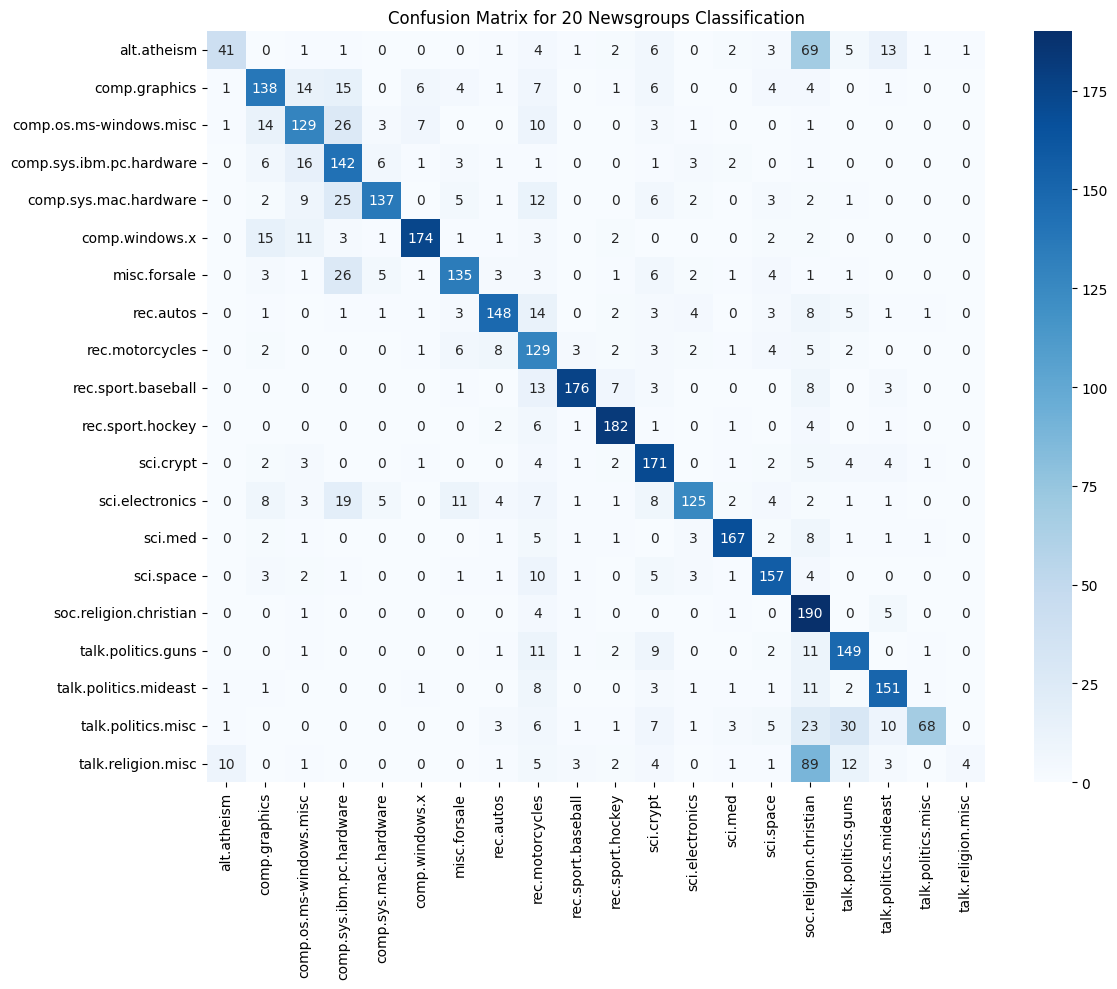

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset
categories = None  # or specify a list of 20 if you want a subset
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
X, y = data.data, data.target

# Step 2: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
X_vec = vectorizer.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Step 4: Train Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Step 5: Predictions and Evaluation
y_pred = clf.predict(X_test)

# Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix for 20 Newsgroups Classification")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
